## Boston Housing Data

The Boston Housing Data is sourced from the UCI Machine Learning Repository. This data consists of 506 records collected in 1978.
Using different training methods and configurations, we can predict the House Values, based on values provided for the attributes.

#### Import requisite packages and perform exploratory data analysis

Here we import the necessary packages and evaluate basis statistical measures for the attributes. Data Visualizations performed using Seaborn and Matplotlib will help us understand dependencies and behavior among the variables.

In [454]:
# import required packages and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.model_selection
from sklearn.model_selection import ShuffleSplit
import sklearn as skl
from sklearn.model_selection import validation_curve

In [511]:
df = pd.read_csv("housing.csv")
price = df['MEDV']

In [442]:
print("Printing initial rows of full dataframe")
df.head()


Printing initial rows of full dataframe


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### Understanding the variables and how they affect house values

#### 1. `RM`
RM represents the average number of rooms in houses in the neighborhood. A higher number of rooms would mean costlier houses.

#### 2. `LSTAT` 
This variable represents the living standard in the neighborhood. Specifically, values in this attribute are the percentage of people in this neighborhood who are considerer "Poor" (Working poor). Areas with low values for this attribute would be considered more valuable

#### 3. `PTRATIO`
PTRATIO is the ratio of students to teachers at the primary and secondary schools in the neighborhood i.e. number of students per teacher. A school with lesser number of students per teacher would generally be considered better, thus driving the house value up.


##### Seperating the prices (MEDV: Median Value) from the other attributes to create the 'features' dataframe

In [575]:
features = df.drop('MEDV', axis = 1)

##### Calculating min, max values as well as mean and standard deviation for the house value attribute

In [417]:
# Print statistics for price data

minimum_price = np.min(price)
print("Minimum price: ${:,}".format(minimum_price))
maximum_price = np.max(price)
print("\nMaximum_price: ${:,}".format(maximum_price))
mean_price = np.mean(price)
print("\nMean_price: ${:,.1f}".format(mean_price))
median_price = np.median(price)
print("\nMedian_price: ${:}".format(median_price))

Minimum price: $105,000.0

Maximum_price: $1,024,800.0

Mean_price: $454,342.9

Median_price: $438900.0


##### Plotting the features against 'price'
This will help us better understand how `RM`, `LSTAT` and `PTRATIO` affect house value.

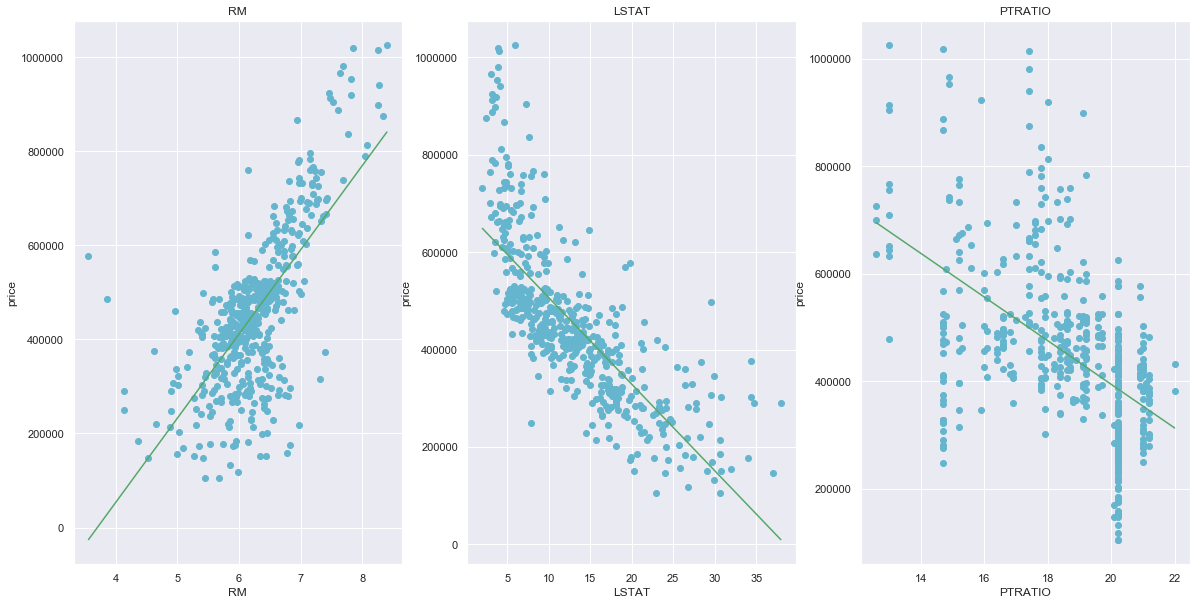

In [446]:
# Setting figure size for Matplotlib
plt.figure(figsize=(20, 10))


# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = features[col]
    y = price
    plt.plot(x, y, 'co')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "g")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

The visualizations above confirm our understanding of relationships between the variables and also provide better insight using the trend line.

###### Plotting distribution of home values in the dataset

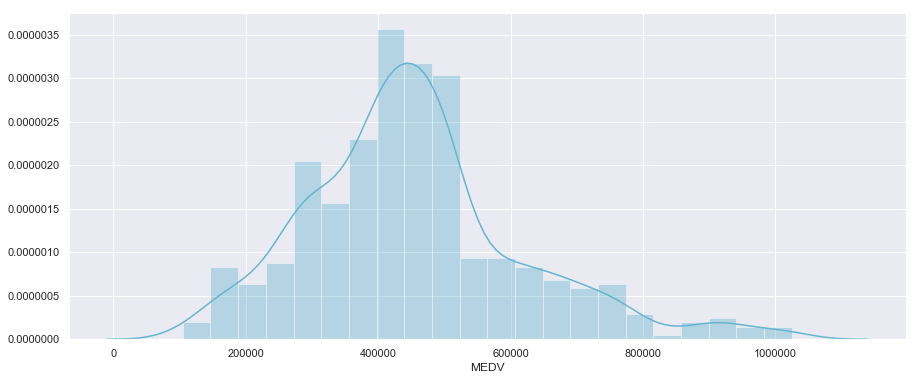

In [449]:
plt.subplots(figsize =(15,6))
sns.distplot(price, color = "c")


Create Seaborn jointplots individual attributes against price to gain better insight into their distribution and behaviour.

<Figure size 1440x1440 with 0 Axes>

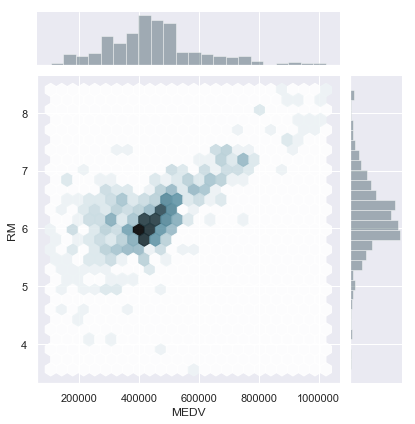

In [551]:
plt.figure(figsize=(20,20))
with sns.color_palette("PuBuGn_d"):
    sns.jointplot(y = 'RM',x = 'MEDV', data = df, kind = "hex", alpha = 0.9)

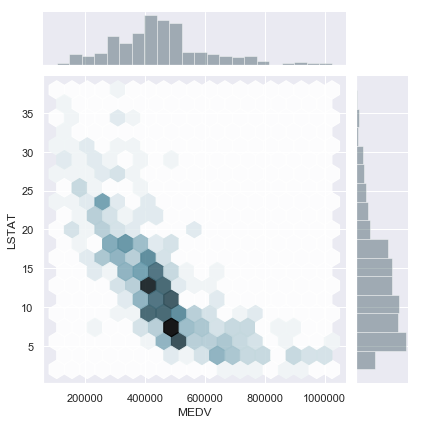

In [451]:
# Plot jointplot for Housevalue vs other attributes
with sns.color_palette("PuBuGn_d"):
    sns.jointplot(y = 'LSTAT',x = 'MEDV', data = df, kind = "hex",alpha = 0.9)

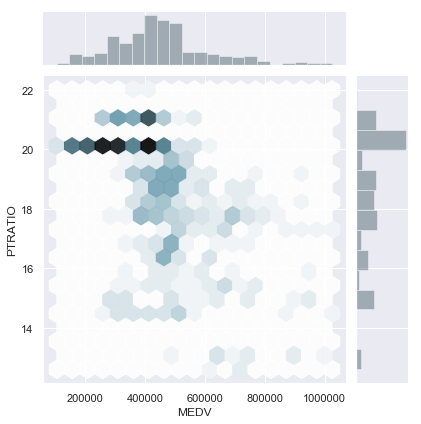

In [452]:

with sns.color_palette("PuBuGn_d"):
    sns.jointplot(y = 'PTRATIO',x = 'MEDV', data = df, kind = "hex", alpha = 0.9)

### Model performance evaluation
In order to understand how a model performs with training and testing data, we need to create a metric that would help us quantify the performance using a measure. 
We define a function called performance_metric which uses `Coefficient of determination` i.e. `R-squared` to measure model performance and demonstrate it using trial values  

In [429]:
def performance_metric(y_true, y_predict):
    from sklearn.metrics import r2_score
    score = r2_score(y_true,y_predict)
    return score

In [430]:
# Calculate coefficient of determination using trial values
score = performance_metric([3,7,4.5,6,8.2], [2.8,7.5,5,4,8.5])
print("The coefficient of determination for R^2 is {:.3f}".format(score))

The coefficient of determination for R^2 is 0.724


Plotting input and predicted trial values

<function matplotlib.pyplot.show(*args, **kw)>

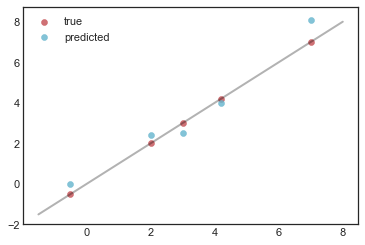

In [574]:
true, pred = [3,-0.5,2,7,4.2], [2.5,0,2.4,8.1,4]

true_handle = plt.scatter(true, true, alpha = 0.8, color = 'r', label = 'true')
plt.style.use('seaborn-white')

# plot reference line:
fit = np.poly1d(np.polyfit(true,true,1))

# set plot axes limits
lims = np.linspace(min(true) - 1, max(true) + 1)

plt.plot(lims,fit(lims), alpha = 0.3, color = 'black')

pred_handle = plt.scatter(true, pred, alpha = 0.8, color = 'c', label = 'predicted')

plt.legend(handles = [true_handle,pred_handle], loc = 'upper left')

plt.show

#### Understanding R-squared score: 
The R2 score is the proportion of the variance in the dependent variable that is predicted from the independent variable.
A R2 score of 1 means that the dependent variable can be predicted from the independent variable, and a score of 0 means that it cannot be predicted.
Any score between 0 and 1 represents the extent to which the dependent variable Y can be predicted using independent variable X i.e. a score of 0.8 would mean that 80% of the variance in Y can be predicted using X.  


In the trial dataset, the R2 value is 0.724 which is considered a good range, thus the model is a successful one.

##### Split dataset into training and test sets, using model_selection
`train_test_split` from sklearn.model_selection is used to create test and training sets. ShuffleSplit is used to shuffle the ordering in the dataset in order to prevent any bias in prediction that might arise out of the order the dataset is in. 
We split the data into a ratio of 4:1 for training:test. 

Reason: The dataset is split to avoid situations where the model is trained on the same data, which will mean that the predictions are always correct and we get a 100% accuracy rate, but would also lead to overfitting, which means that the model becomes so complicated that it does not know how to deal with new data.
The other option is to create a big test set, but that would create a model that is so generalized that it gives very low accuracy. 


In [432]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, price, test_size = 0.2, random_state = 42)

print("Training and testing split was successful")

Training and testing split was successful


#### Maximum Depth
An important parameter for Models is the depth of the tree, which is essentially the number of questions a model is allowed to ask before it makes a prediction. It is vital to understand max_depth in order to optimize model performance. 

In [545]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def ModelLearning(X, y):
    # Creating 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2,  random_state = None)
    
    # Generating the training test sizes
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)
    
    # Create figure window
    fig = plt.figure(figsize=(18,12))
    
    # Create different models based on max_depth
    
    for k, depth in enumerate([1,3,6,10]):
        # Configure decision tree regressor
        regressor = DecisionTreeRegressor(max_depth = depth)
        
        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv = cv, train_sizes = train_sizes, scoring = 'r2')
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)
        
        # configure visualization  
        
        ax = fig.add_subplot(2,2,k+1)
        # subplot the learning curve
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean,'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Setting labels 
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0,X.shape[0]*0.8])
        ax.set_ylim([-0.05,1.05])
        
        # Setting up aesthetics
        ax.legend(bbox_to_anchor = (1.05,2.05),loc = 'lower left')
        fig.suptitle('Learning Performances: Decision Tree Regressor', 
                    fontsize = 16, y = 1.03)
        fig.tight_layout()
        fig.show()
        
        
        
def ModelComplexity(X,y):
    # create cross validation sets
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state = 0)
    
    # Set up max_depth between 1 & 10
    max_depth = np.arange(1,11)
    
    # Calculate training and test scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')
    
    # Calculate mean and standard deviation for train and test scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    
    # Plotting validation curve
    # fig = plt.figure(figsize=(18,8))
    plt.title('Complexity Performance: Decision Tree Regressor')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, 
                     train_mean + train_std,
                    alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std,
                     test_mean + test_std, alpha = 0.15,
                    color = 'g')
    
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05, 1.05])
    plt.show()
        
        

def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """
    prices = []
    
    for k in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = k)
    
    # Fit the date
    reg = fitter(X_train, y_train)
    
    # Make a prediction
    pred = reg.predict([data[0]])[0]
    prices.append(pred)
    
    # Print result
    print("Trial {}: ${:,.2f}".format(k+1), pred)
    
    print("\nRange in prices: $}:,.2f".format(max(prices)-min(prices)))
    
    

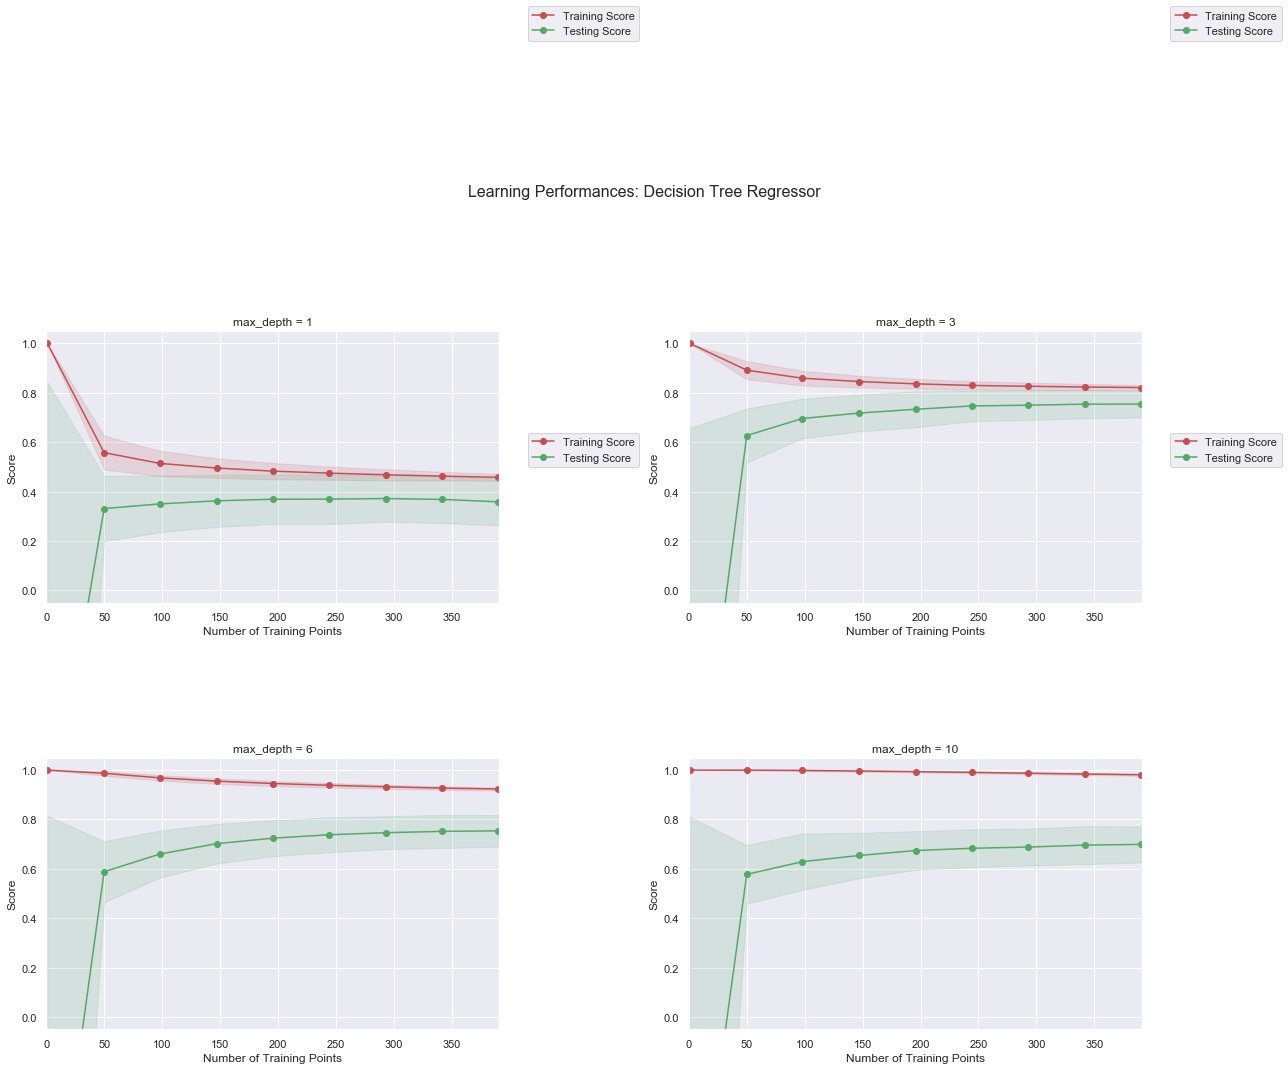

In [546]:
ModelLearning(features, price)

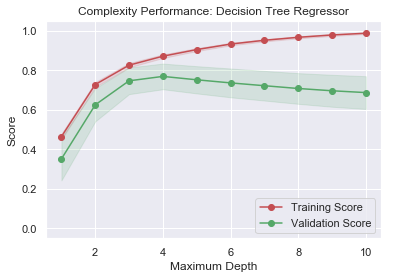

In [441]:
ModelComplexity(X_train, y_train)

In [468]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X,y):
    # Create cross-validation sets from training data
    
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    # Create decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 1001)
    
    # create dictionary for max_depth
    tree_range = range(1,11)
    params = dict(max_depth= [1,2,3,4,5,6,7,8,9,10])
    
    # transforming 'performance_metric' into a scoring function using make_scorer
    
    scoring_func = make_scorer(performance_metric)
    
    # Create gridSearch cross-validation object
    
    grid = GridSearchCV(regressor, params, scoring = scoring_func, cv = cv_sets)
    
    grid = grid.fit(X,y)
    
    return grid.best_estimator_ 

In [469]:
reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


#### Predicting values of home for clients based on given attribute values

In [489]:
client_data = [[5,17,15],
              [4,32,22],
               [8,20,11]]
print("Client data\nRM","LSTAT","PTRATIO")
print(client_data[0])
print(client_data[1])
print(client_data[2])
print("\n")

for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))



Client data
RM LSTAT PTRATIO
[5, 17, 15]
[4, 32, 22]
[8, 20, 11]


Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $344,400.00


#### In this step we visualize our predicted home prices with the rest of the data

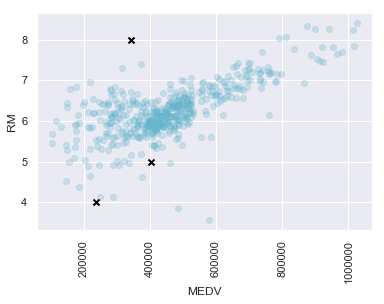

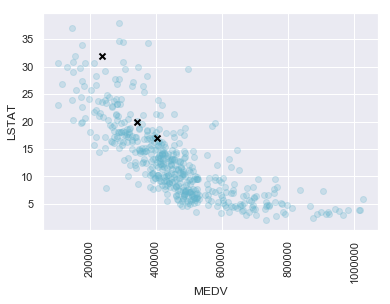

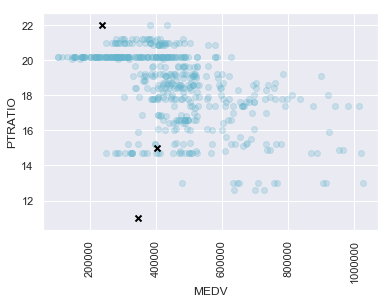

In [536]:
pred = reg.predict(client_data)

# transposing client_data 
clients = np.transpose(client_data)

for i, feat in enumerate(['RM','LSTAT','PTRATIO']):
    
    plt.scatter(price, features[feat], alpha=0.25, c='c')
    plt.scatter(pred, clients[i], color = 'black', marker = 'x', linewidth = 2)
    plt.xlabel('MEDV')
    plt.ylabel(feat)
    plt.xticks(rotation='vertical')
    plt.show()

#### Model performance
Let's have a look at the R-squared value for the model

In [537]:
reg = fit_model(X_train, y_train)
pred = reg.predict(X_test)
score = performance_metric(y_test,pred)
print("R Squared Value: " + str(score))

R Squared Value: 0.8439995575360899


The R-squared value of 0.84 reflects a high performing model. 